In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import os
import math
%matplotlib inline

In [2]:
mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30
mpl.rcParams.update({'font.size': 30})

In [3]:
def plotHeatmap(x,y,nbin,xlabel='',ylabel='',title='',hold=False):

    [HH,xh,yh] = np.histogram2d(x,y,bins=(nbin,nbin))
    HH = HH.T/(1.)
    xmin,xmax=xh[0],xh[-1]
    ymin,ymax=yh[0],yh[-1]
    plt.imshow(HH,interpolation='nearest',origin='low',extent=[xmin,xmax,ymin,ymax],aspect='auto',cmap='gist_ncar')#,cmap='jet',vmin=0.,vmax=100,aspect='auto')
    plt.colorbar()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)    
    plt.title(title)   
    if not hold:
        plt.show()
    plt.close()
    return [HH,xh,yh]

In [4]:
def stateThresholds():
    ''''''
    return {'Zeb mRNA':[ 62+(301-62)/2.,301+(990-301)/2.]
            ,'$\mu_{200}$':[1265+(12389-1265)/2.,12389+(19098-12389)/2.],
            'Hif-1':[26+(292-26)/2.,292+(490-292)/2.],
            'AMPK':[69+(327-69)/2.,327+(436-327)/2.]}

In [5]:
stateThresholds()

{'$\\mu_{200}$': [6827.0, 15743.5],
 'AMPK': [198.0, 381.5],
 'Hif-1': [159.0, 391.0],
 'Zeb mRNA': [181.5, 645.5]}

In [6]:
def getStates_fromMap(df_res,hold=False):

    x2 = df_res['A']
    y2 = df_res['h']
    x1 = df_res['u']
    y1 = df_res['mz']
    hm1= plotHeatmap(x1,y1,10,'$\mu_{200}$','Zeb mRNA','Steady States',hold)
    hm2 =plotHeatmap(x2,y2,10,'AMPK','Hif-1','Steady States',hold)
    res2,res1={'n':[],'u':[],'mz':[]},{'n':[],'A':[],'h':[]}
    
    thresh = stateThresholds()
            
    E = (df_res['u']>thresh['$\mu_{200}$'][1])*(df_res['mz']<=thresh['Zeb mRNA'][0])
    M = (df_res['u']<=thresh['$\mu_{200}$'][0])*(df_res['mz']>thresh['Zeb mRNA'][1])
    EM =(df_res['u']>thresh['$\mu_{200}$'][0])*(df_res['u']<=thresh['$\mu_{200}$'][1])*(df_res['mz']>thresh['Zeb mRNA'][0])*(df_res['mz']<=thresh['Zeb mRNA'][1])
    
    
    O = (df_res['A']>thresh['AMPK'][1])*(df_res['h']<=thresh['Hif-1'][0])
    W = (df_res['A']<=thresh['AMPK'][0])*(df_res['h']>thresh['Hif-1'][1])
    WO =(df_res['A']>thresh['AMPK'][0])*(df_res['A']<=thresh['AMPK'][1])*(df_res['h']>thresh['Hif-1'][0])*(df_res['h']<=thresh['Hif-1'][1])
    
    
    #print E,M,EM,E+EM+M,np.sum(df_res['u']>=-11)
    #print O,W,WO,O+W+WO
    
    tmp = np.sum(E)+np.sum(EM)+np.sum(M)+np.sum(O)+np.sum(WO)+np.sum(W)
    resultsS = {'name':['E','EM','M','O','WO','W','unknown'],
                'amount':[np.sum(E),np.sum(EM),np.sum(M),np.sum(O),np.sum(WO),np.sum(W),len(df_res['Z'])-tmp]}
    
    tmp = np.sum(E*O)+np.sum(E*WO)+np.sum(E*W)+np.sum(EM*O)+np.sum(EM*WO)+np.sum(EM*W)+np.sum(M*O)+np.sum(M*WO)+np.sum(M*W)
    resultsE = {}
    resultsE = {'name':['E/O','E/WO','E/W','EM/O','EM/WO','EM/W','M/O','M/WO','M/W','unknown'],
                'amount':[np.sum(E*O),np.sum(E*WO),np.sum(E*W),np.sum(EM*O),np.sum(EM*WO),np.sum(EM*W),np.sum(M*O),np.sum(M*WO),np.sum(M*W),len(df_res['Z'])-tmp]}
    maxV = np.max(resultsE['amount'])
    #print np.sum(resultsE['amount']),len(df_res['Z'])
    return resultsE,resultsS,maxV

In [7]:
def plotRes(filename):
    df_res = pd.read_csv(filename).dropna()  
    mapResE,mapResS,maxC =getStates_fromMap(df_res)
    
    my_cmap = mpl.cm.get_cmap('rainbow')#gist_ncar')
    my_norm = Normalize(vmin=0, vmax=maxC)
    #ax.bar(range(8), rand(8), color=my_cmap(my_norm(data)))
    '''
    xvals = np.arange(0,len(mapRes['amount']))
    plt.bar(xvals,mapRes['amount'],color=my_cmap(my_norm(mapRes['amount'])))
    plt.xticks(xvals,mapRes['name'],rotation=80)
    plt.yscale("log")
    plt.xlabel("Steady state")
    plt.ylabel("Number of Initial Conditions")
    plt.show()
    plt.close()
    '''
    
    fig = plt.figure()
    xvals = np.arange(0,len(mapResE['amount']))
    plt.bar(xvals,mapResE['amount'],color=my_cmap(my_norm(mapResE['amount'])))
    plt.xticks(xvals,mapResE['name'],rotation=80)
    plt.yscale("log")
    plt.xlabel("Steady state")
    plt.ylabel("Number of Initial Conditions")
    title = filename.replace("res","emt")
    title = title.replace("txt","png")
    print title
    #fig.savefig(title,bbox_inches='tight')
    plt.show()
    plt.close()

    '''
    fig = plt.figure()
    xvals = np.arange(0,len(mapResM['amount']))
    plt.bar(xvals,mapResM['amount'],color=my_cmap(my_norm(mapResM['amount'])))
    plt.xticks(xvals,mapResM['name'],rotation=80)
    plt.yscale("log")
    plt.xlabel("Steady state")
    plt.ylabel("Number of Initial Conditions")
    title = filename.replace("txt","png")
    title = title.replace("res","mr")
    print title
    fig.savefig(title,bbox_inches='tight')
    '''
    
    plt.show()


In [8]:
def plotCoupled(results,nocross,nics,title):
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(30,35))
    plt.subplots_adjust(hspace=0.3,right=0.85)
    for name in results:
        ax1.plot(results[name]['E/O'][0],results[name]['E/O'][1],'*-',markersize=20,label=name)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        ax2.plot(results[name]['E/WO'][0],results[name]['E/WO'][1],'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        ax3.plot(results[name]['E/W'][0],results[name]['E/W'][1],'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        ax4.plot(results[name]['EM/O'][0],results[name]['EM/O'][1],'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        ax5.plot(results[name]['EM/WO'][0],results[name]['EM/WO'][1],'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        ax6.plot(results[name]['EM/W'][0],results[name]['EM/W'][1],'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        ax7.plot(results[name]['M/O'][0],results[name]['M/O'][1],'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        ax8.plot(results[name]['M/WO'][0],results[name]['M/WO'][1],'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        ax9.plot(results[name]['M/W'][0],results[name]['M/W'][1],'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        
    ax1.hlines(nocross['amount'][0]/nics*100.,xmin=np.min(results[name]['E/O'][0]),xmax=np.max(results[name]['E/O'][0]),linewidth=4,label='No crosstalk')
    ax2.hlines(nocross['amount'][1]/nics*100.,xmin=np.min(results[name]['E/O'][0]),xmax=np.max(results[name]['E/O'][0]),linewidth=4)
    ax3.hlines(nocross['amount'][2]/nics*100.,xmin=np.min(results[name]['E/O'][0]),xmax=np.max(results[name]['E/O'][0]),linewidth=4)
    ax4.hlines(nocross['amount'][3]/nics*100.,xmin=np.min(results[name]['E/O'][0]),xmax=np.max(results[name]['E/O'][0]),linewidth=4)
    ax5.hlines(nocross['amount'][4]/nics*100.,xmin=np.min(results[name]['E/O'][0]),xmax=np.max(results[name]['E/O'][0]),linewidth=4)
    ax6.hlines(nocross['amount'][5]/nics*100.,xmin=np.min(results[name]['E/O'][0]),xmax=np.max(results[name]['E/O'][0]),linewidth=4)
    ax7.hlines(nocross['amount'][6]/nics*100.,xmin=np.min(results[name]['E/O'][0]),xmax=np.max(results[name]['E/O'][0]),linewidth=4)
    ax8.hlines(nocross['amount'][7]/nics*100.,xmin=np.min(results[name]['E/O'][0]),xmax=np.max(results[name]['E/O'][0]),linewidth=4)
    ax9.hlines(nocross['amount'][8]/nics*100.,xmin=np.min(results[name]['E/O'][0]),xmax=np.max(results[name]['E/O'][0]),linewidth=4)
    ax1.set_xlabel("Foldchange")#"Steady state")
    ax2.set_xlabel("Foldchange")#"Steady state")
    ax3.set_xlabel("Foldchange")#"Steady state")
    ax4.set_xlabel("Foldchange")#"Steady state")
    ax5.set_xlabel("Foldchange")#"Steady state")
    ax6.set_xlabel("Foldchange")#"Steady state")
    ax7.set_xlabel("Foldchange")#"Steady state")
    ax8.set_xlabel("Foldchange")#"Steady state")
    ax9.set_xlabel("Foldchange")#"Steady state")
    ax1.set_ylabel("Percentage IC ")
    ax2.set_ylabel("Percentage IC ")
    ax3.set_ylabel("Percentage IC ")
    ax4.set_ylabel("Percentage IC ")
    ax5.set_ylabel("Percentage IC ")
    ax6.set_ylabel("Percentage IC ")
    ax7.set_ylabel("Percentage IC ")
    ax8.set_ylabel("Percentage IC ")
    ax9.set_ylabel("Percentage IC ")
    ax1.set_title("E/O")
    ax2.set_title("E/WO")
    ax3.set_title("E/W")
    ax4.set_title("EM/O")
    ax5.set_title("EM/WO")
    ax6.set_title("EM/W")
    ax7.set_title("M/O")
    ax8.set_title("M/WO")
    ax9.set_title("M/W")
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles,labels=labels,loc="center right",borderaxespad=0.1,title="Legend")
    fig.savefig(title+"_coupledStates.png",bbox_inches='tight')
    plt.show()

In [9]:
def plotStateSum(results,nocross,nics,title):
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(30,20))
    plt.subplots_adjust(hspace=0.3,right=0.85)

    for name in results:
        ax1.plot(results[name]['E'][0],results[name]['E'][1],'*-',markersize=20,label=name)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        ax2.plot(results[name]['EM'][0],results[name]['EM'][1],'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        ax3.plot(results[name]['M'][0],results[name]['M'][1],'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        ax4.plot(results[name]['O'][0],results[name]['O'][1],'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        ax5.plot(results[name]['WO'][0],results[name]['WO'][1],'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        ax6.plot(results[name]['W'][0],results[name]['W'][1],'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        
    ax1.hlines(nocross['amount'][0]/nics*100.,xmin=np.min(results[name]['E'][0]),xmax=np.max(results[name]['E'][0]),linewidth=4,label='No crosstalk')
    ax2.hlines(nocross['amount'][1]/nics*100.,xmin=np.min(results[name]['E'][0]),xmax=np.max(results[name]['E'][0]),linewidth=4)
    ax3.hlines(nocross['amount'][2]/nics*100.,xmin=np.min(results[name]['E'][0]),xmax=np.max(results[name]['E'][0]),linewidth=4)
    ax4.hlines(nocross['amount'][3]/nics*100.,xmin=np.min(results[name]['E'][0]),xmax=np.max(results[name]['E'][0]),linewidth=4)
    ax5.hlines(nocross['amount'][4]/nics*100.,xmin=np.min(results[name]['E'][0]),xmax=np.max(results[name]['E'][0]),linewidth=4)
    ax6.hlines(nocross['amount'][5]/nics*100.,xmin=np.min(results[name]['E'][0]),xmax=np.max(results[name]['E'][0]),linewidth=4)
    ax1.set_xlabel("Foldchange")#"Steady state")
    ax2.set_xlabel("Foldchange")#"Steady state")
    ax3.set_xlabel("Foldchange")#"Steady state")
    ax4.set_xlabel("Foldchange")#"Steady state")
    ax5.set_xlabel("Foldchange")#"Steady state")
    ax6.set_xlabel("Foldchange")#"Steady state")
    ax1.set_ylabel("Percentage IC ")
    ax2.set_ylabel("Percentage IC ")
    ax3.set_ylabel("Percentage IC ")
    ax4.set_ylabel("Percentage IC ")
    ax5.set_ylabel("Percentage IC ")
    ax6.set_ylabel("Percentage IC ")
    ax1.set_title("E")
    ax2.set_title("EM")
    ax3.set_title("M")
    ax4.set_title("O")
    ax5.set_title("WO")
    ax6.set_title("W")
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles,labels=labels,loc="center right",borderaxespad=0.1,title="Legend")
    fig.savefig(title+"_stateSum.png",bbox_inches='tight')
    plt.show()

In [10]:
def plotPercAll(regs,title=''):
    
    df_res =pd.read_csv("coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_1000_res.txt")
    nocross,noCs,tmp  =getStates_fromMap(df_res)
    
    results={}
    resultsSum={}
    for name in regs:
        fcL = np.array(regs[name]).astype(float)
        if 0 in fcL:
            fcL = fcL*0.1
    
        tmpL={'E/O':[[],[]],'E/W':[[],[]],'E/WO':[[],[]],'EM/O':[[],[]],'EM/W':[[],[]],'EM/WO':[[],[]],'M/O':[[],[]],'M/W':[[],[]],'M/WO':[[],[]],'unknown':[[],[]]}
        tmpS={'E':[[],[]],'EM':[[],[]],'M':[[],[]],'O':[[],[]],'WO':[[],[]],'W':[[],[]],'unknown':[[],[]]}
        for i in range(len(fcL)):
            nics=1000.
            try:
                df = pd.read_csv("coupledWReg_Ccode/crosstalk_singles/EMT_MR_"+str(name)+str(regs[name][i])+"_"+str(int(nics))+"_res.txt").dropna()

                mapResE,resSum,maxC =getStates_fromMap(df,hold=True)
                for k in range(len(mapResE['name'])):
                    tmp = mapResE['name'][k]
                    tmpL[tmp][0]+=[fcL[i]] 
                    tmpL[tmp][1]+=[mapResE['amount'][k]/nics*100.]

                for k in range(len(resSum['name'])):
                    tmp = resSum['name'][k]
                    tmpS[tmp][0]+=[fcL[i]]
                    tmpS[tmp][1]+=[resSum['amount'][k]/nics*100.]
            except:
                print "error with ", regs[name][i]

        for key in tmpL:
            ind = np.argsort(tmpL[key][0])
            tmpL[key][0] = np.array(tmpL[key][0])[ind]
            tmpL[key][1] = np.array(tmpL[key][1])[ind]
            
        for key in tmpS:
            ind = np.argsort(tmpS[key][0])
            tmpS[key][0]= np.array(tmpS[key][0])[ind]
            tmpS[key][1]= np.array(tmpS[key][1])[ind]
            
        results[name]=tmpL
        resultsSum[name]=tmpS
            
    plotCoupled(results,nocross,nics,title)
    plotStateSum(resultsSum,noCs,nics,title)
    

    #plt.close()


In [11]:
direct = "coupledWReg_Ccode/crosstalk_singles/"
regs={}
for filen in os.listdir(direct):
    if "res.txt" in filen:
        
        #plotRes(direct+filen)
        name= filen.split(".")[0].split("_")[2]
        lamda=''
        while name[-1].isdigit():
            lamda+=name[-1]
            name = name[:-1]
        
        if name not in regs.keys():
            regs[name]=[]
        regs[name]+=[lamda]

        
regsI,regsA,regsU={},{},{}
for k in regs:
    print k
    if 0 in np.array(regs[k]).astype(float):
        regsI[k]=regs[k]
    elif 'u3' in k:
        regsU[k] = regs[k]
    else:
        regsA[k] = regs[k]
    

lamdaAZ
lamdaHS
lamdau3Rm
lamdau3Rn
lamdaAS
lamdaIHu
lamdaAu
lamdaHu


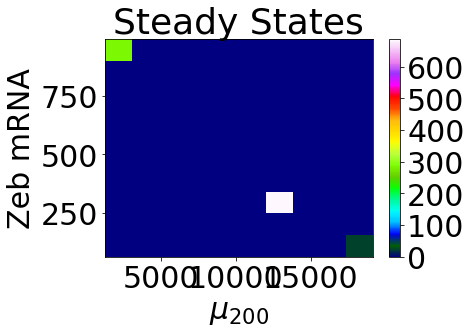

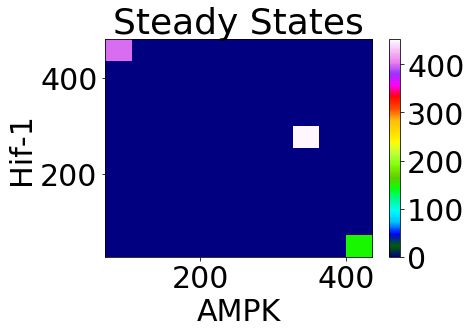

/home/madeline/anaconda2/lib/python2.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/home/madeline/anaconda2/lib/python2.7/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


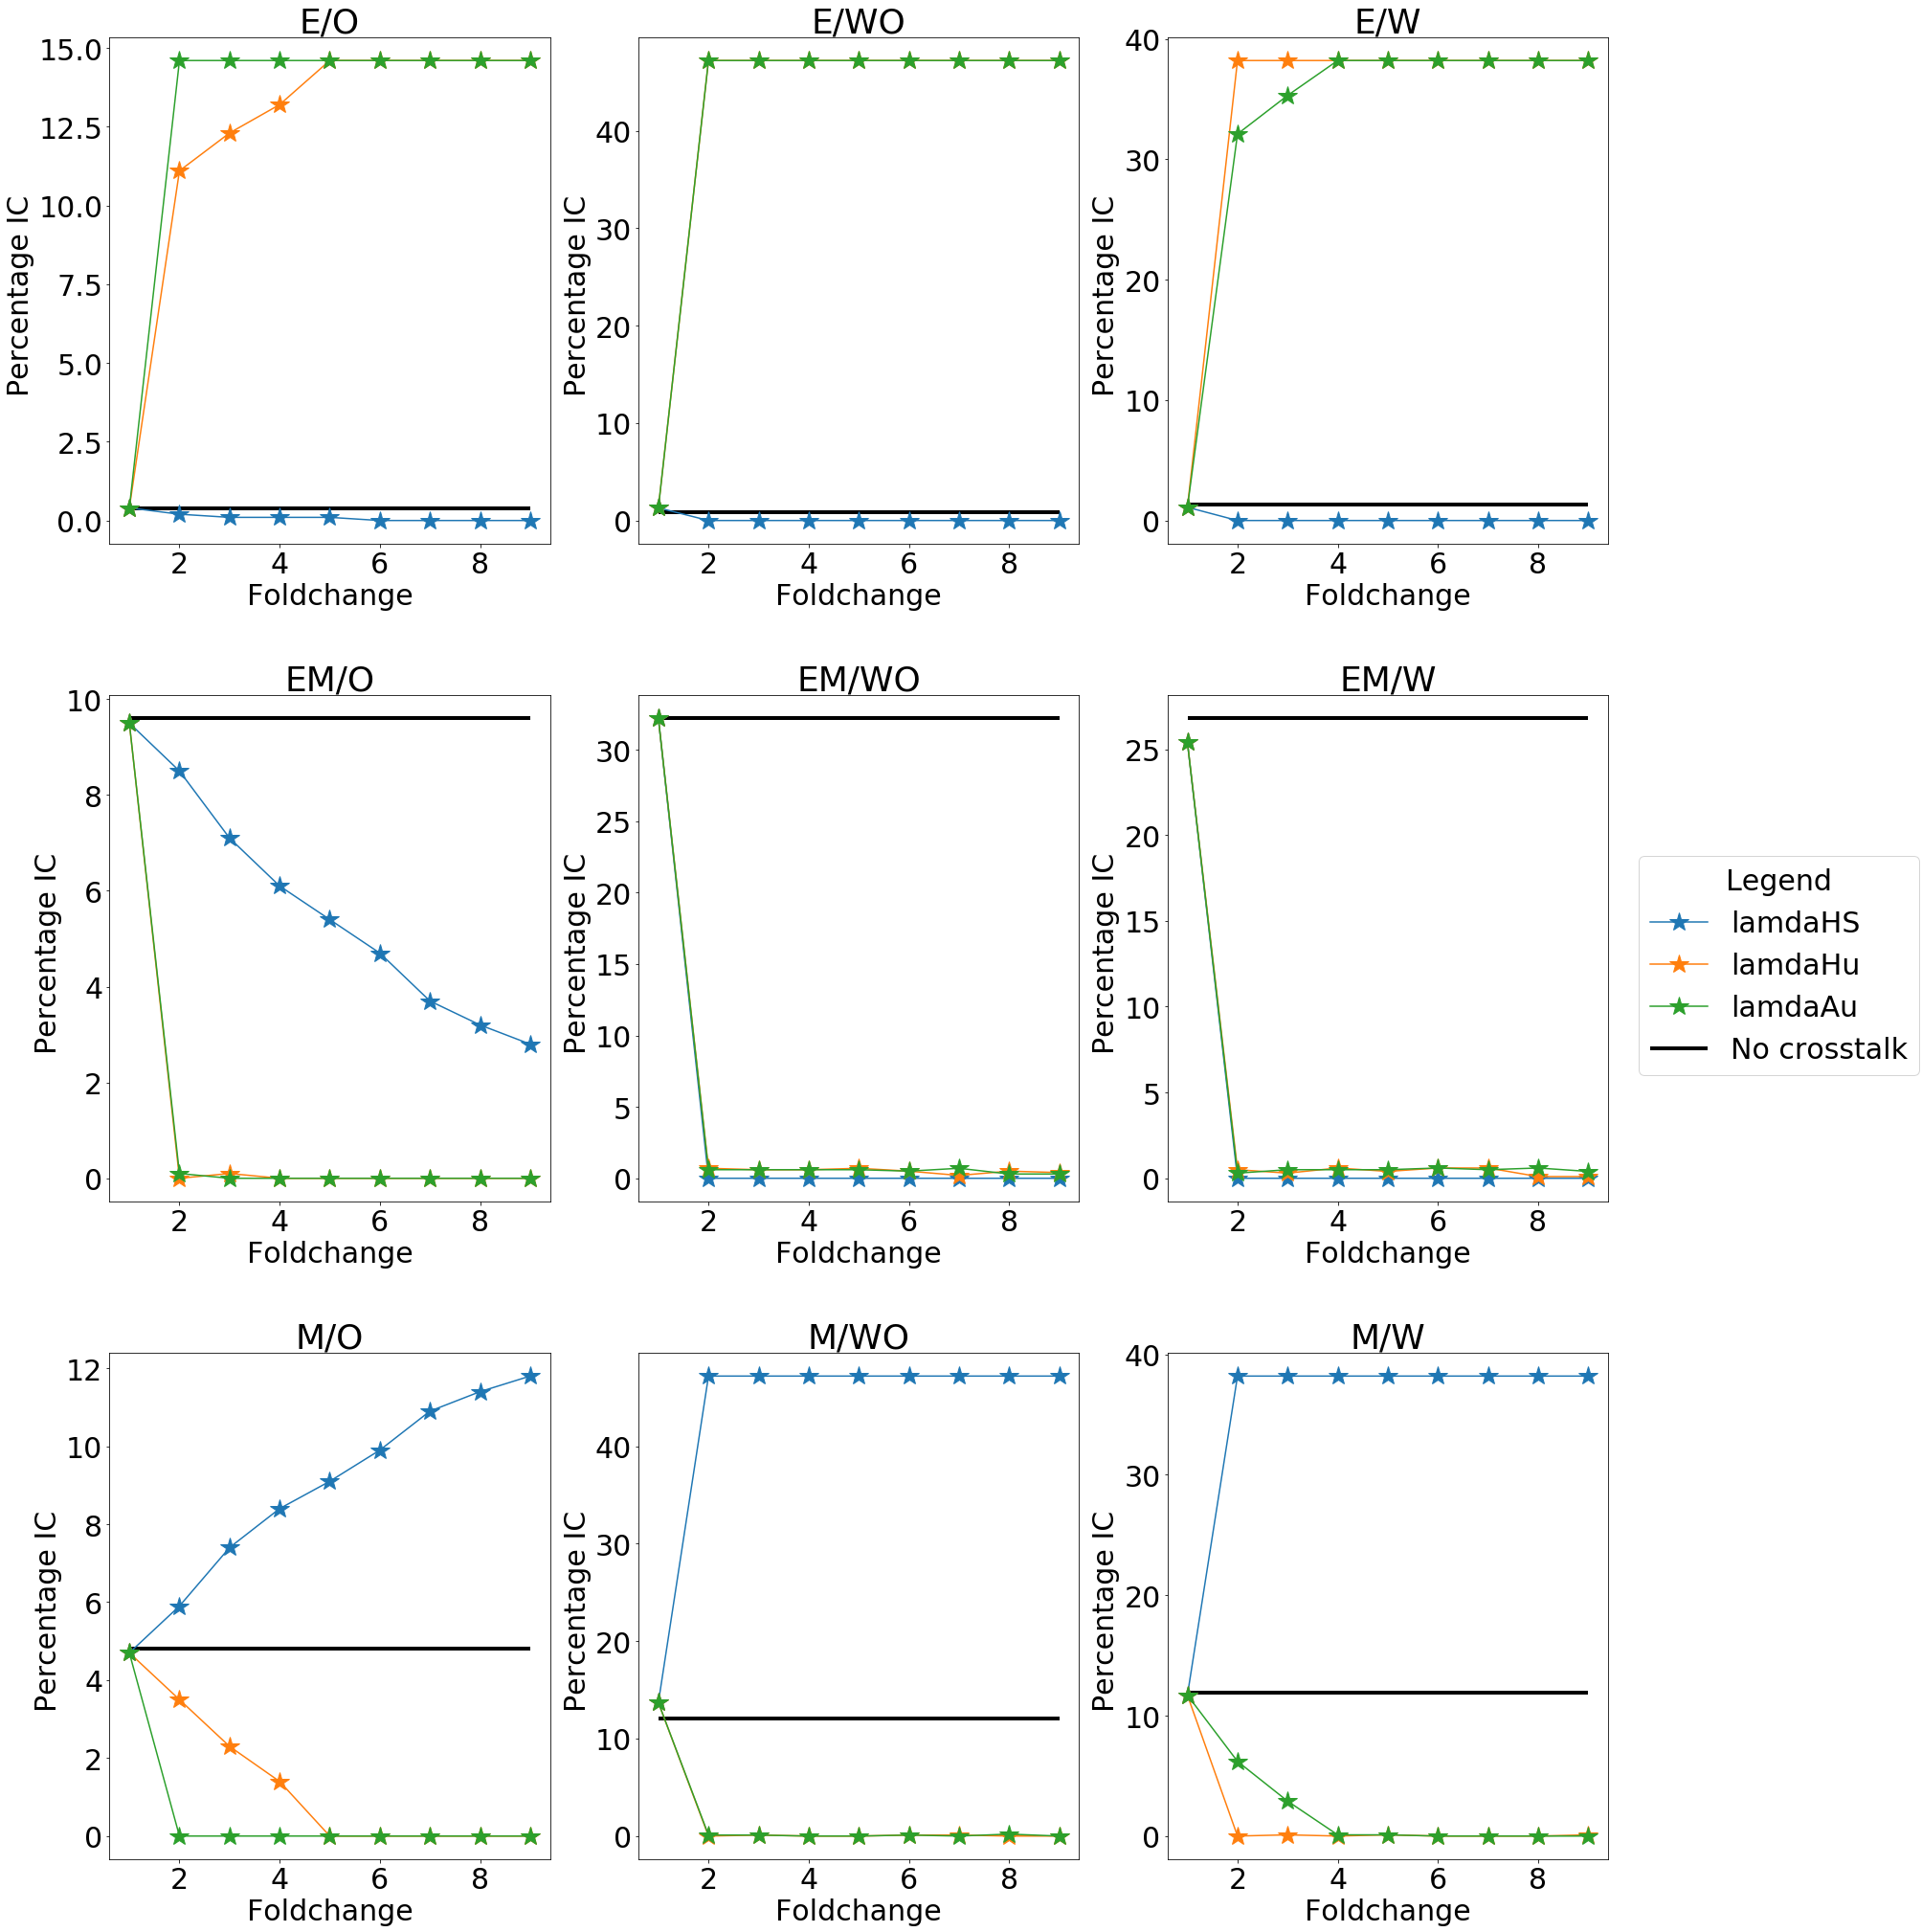

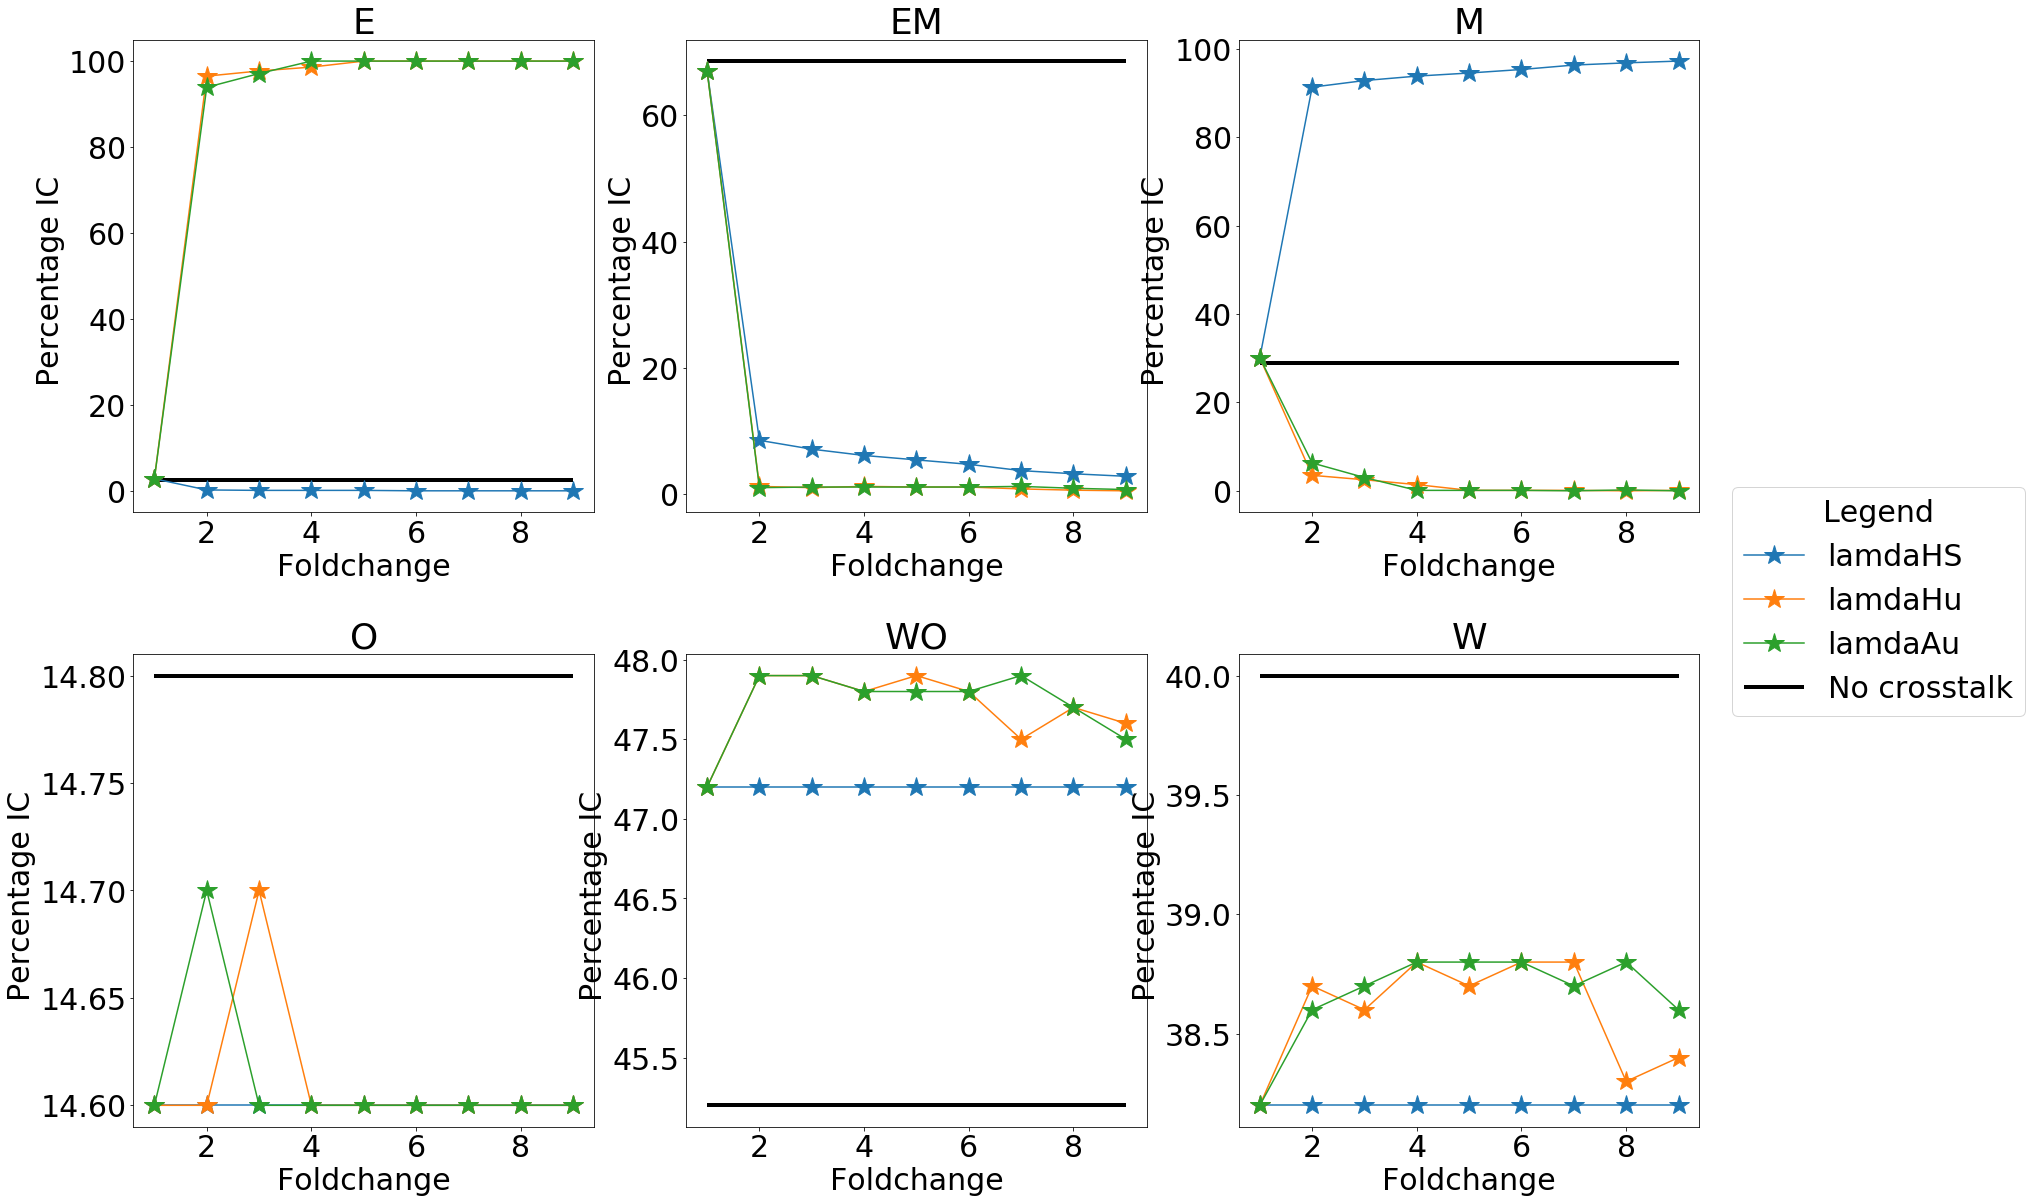

In [12]:
plotPercAll(regsA,'activationSingle')

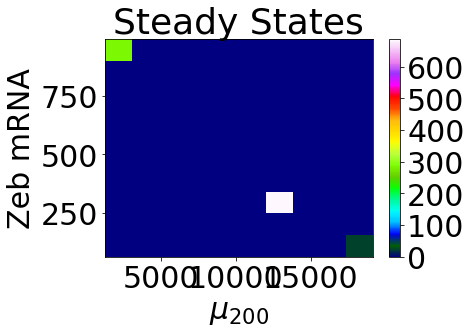

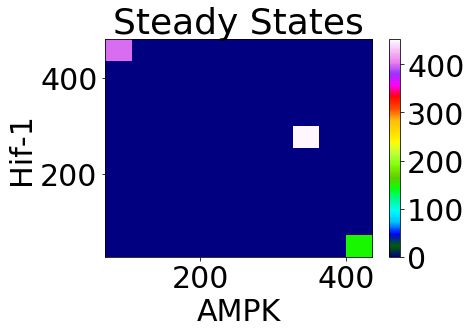

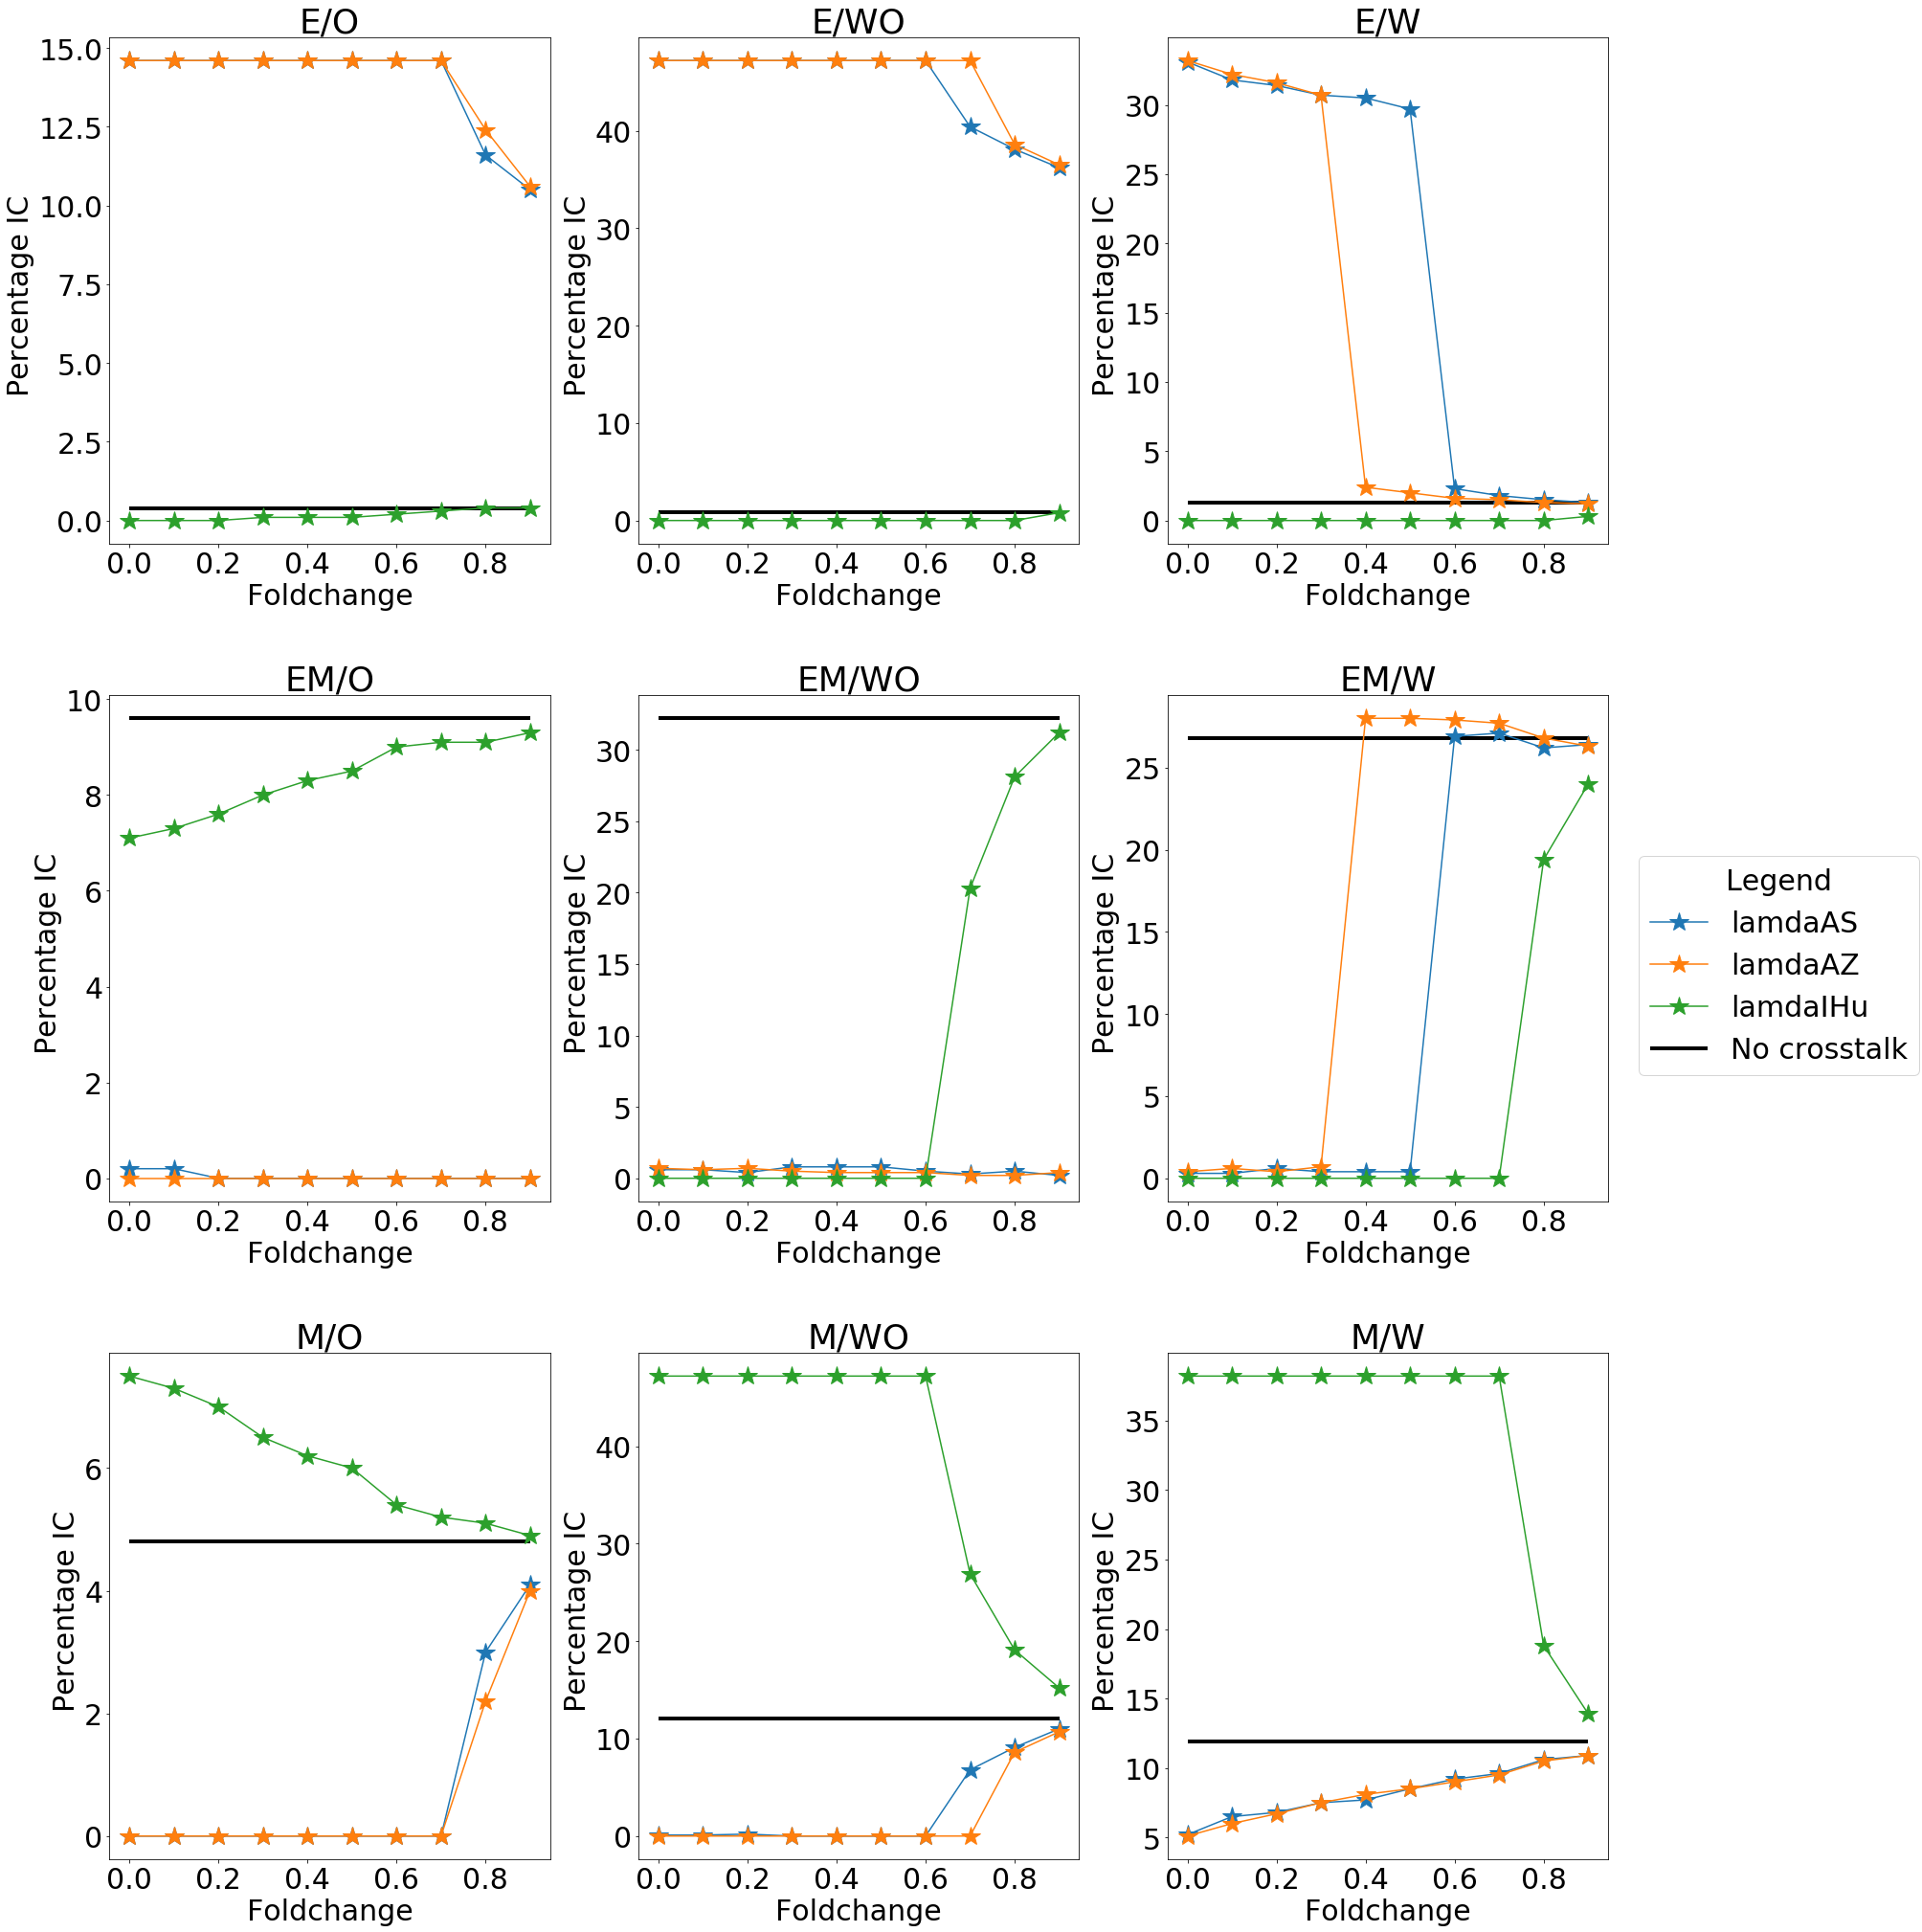

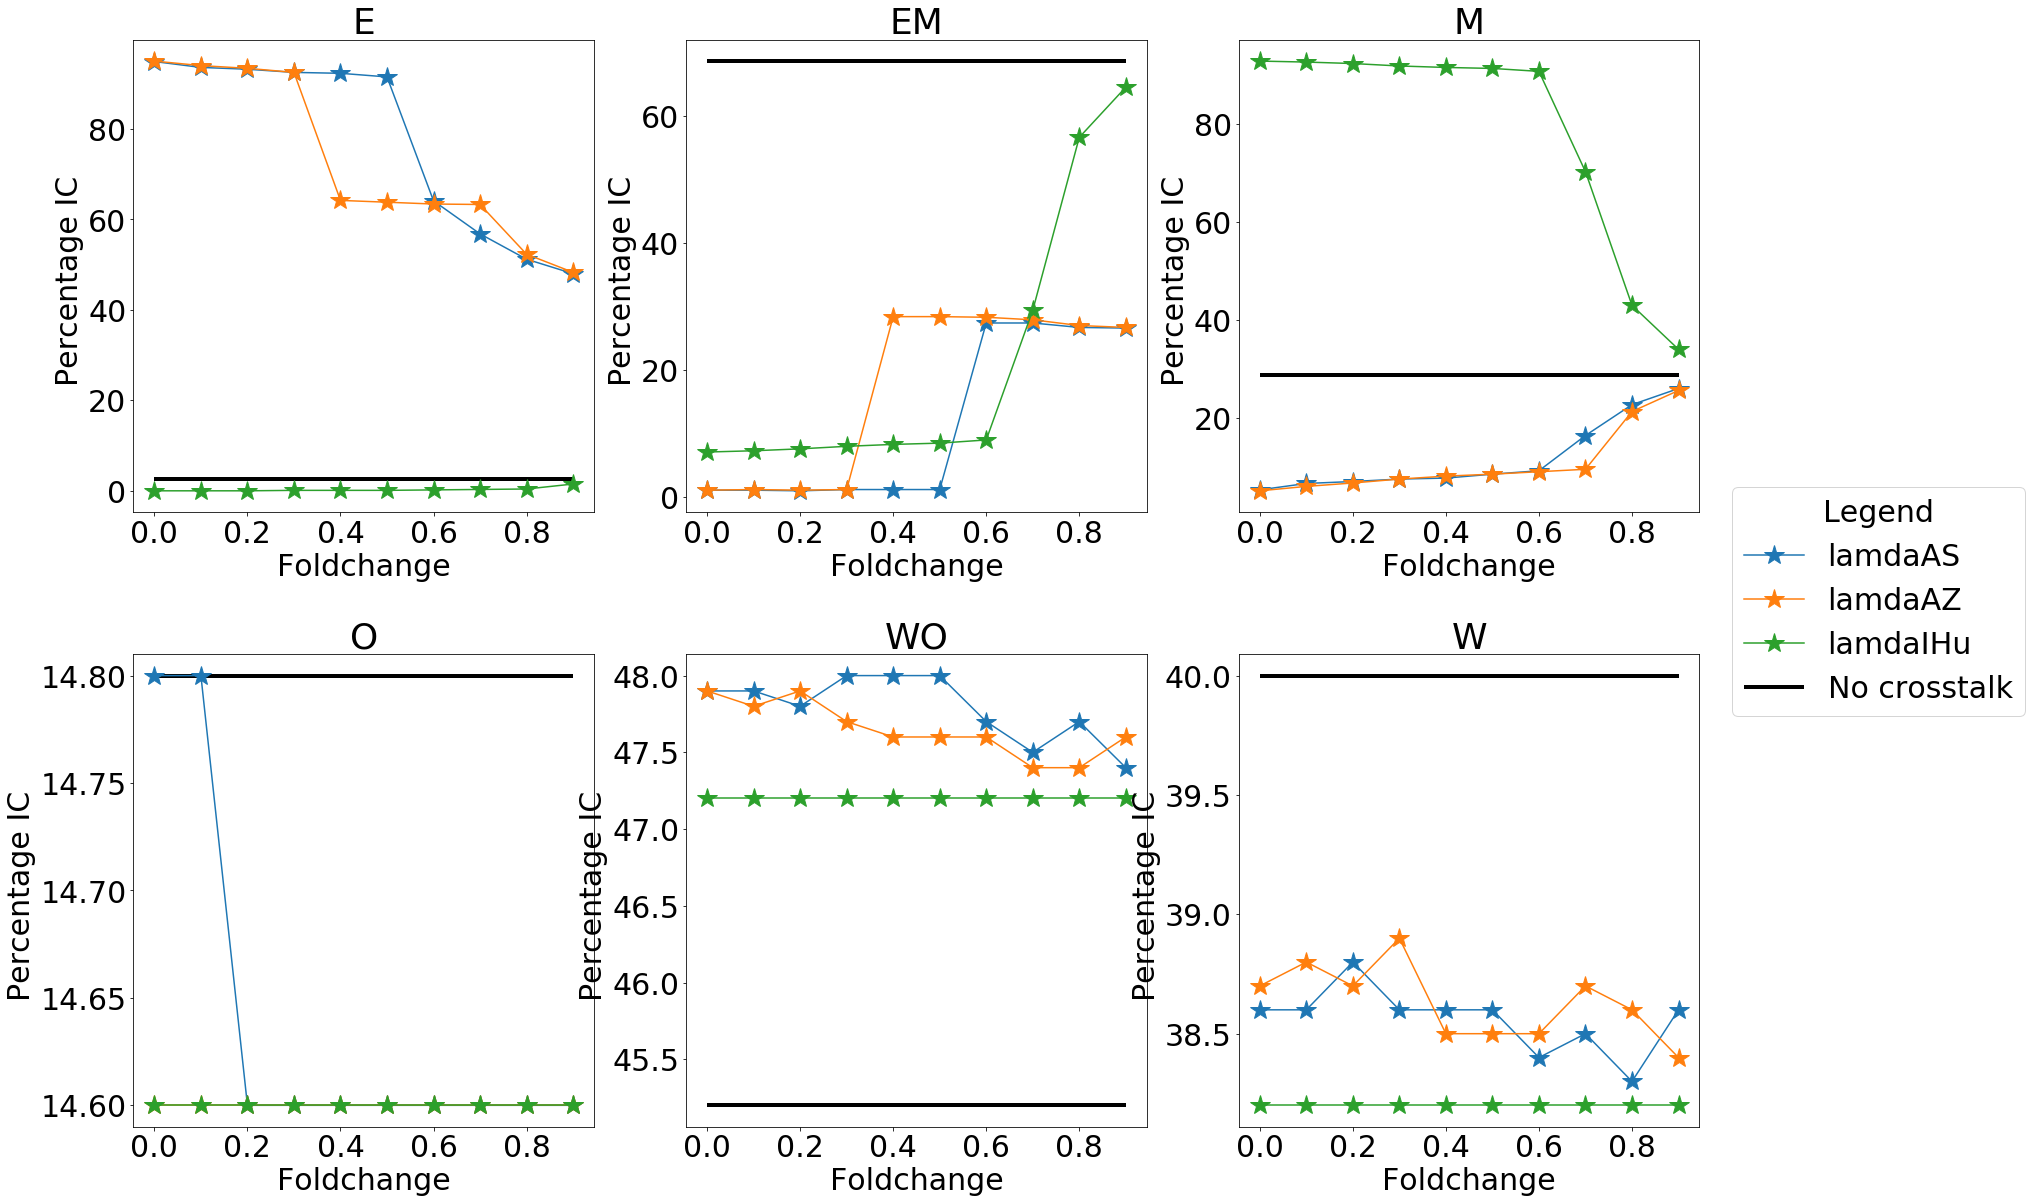

In [13]:
plotPercAll(regsI,'inhibitionSingle')

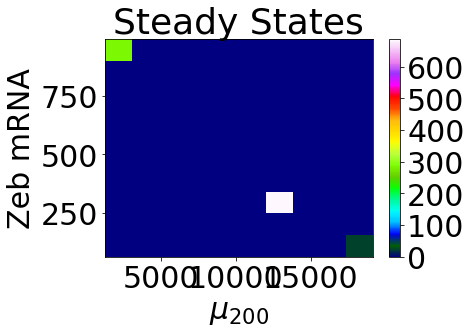

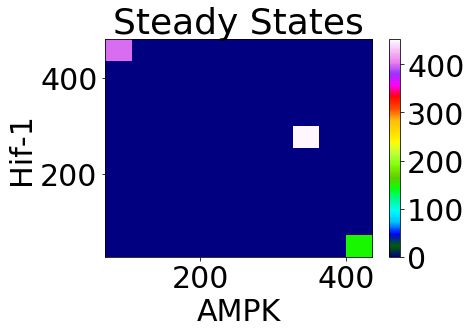

error with  7
error with  6


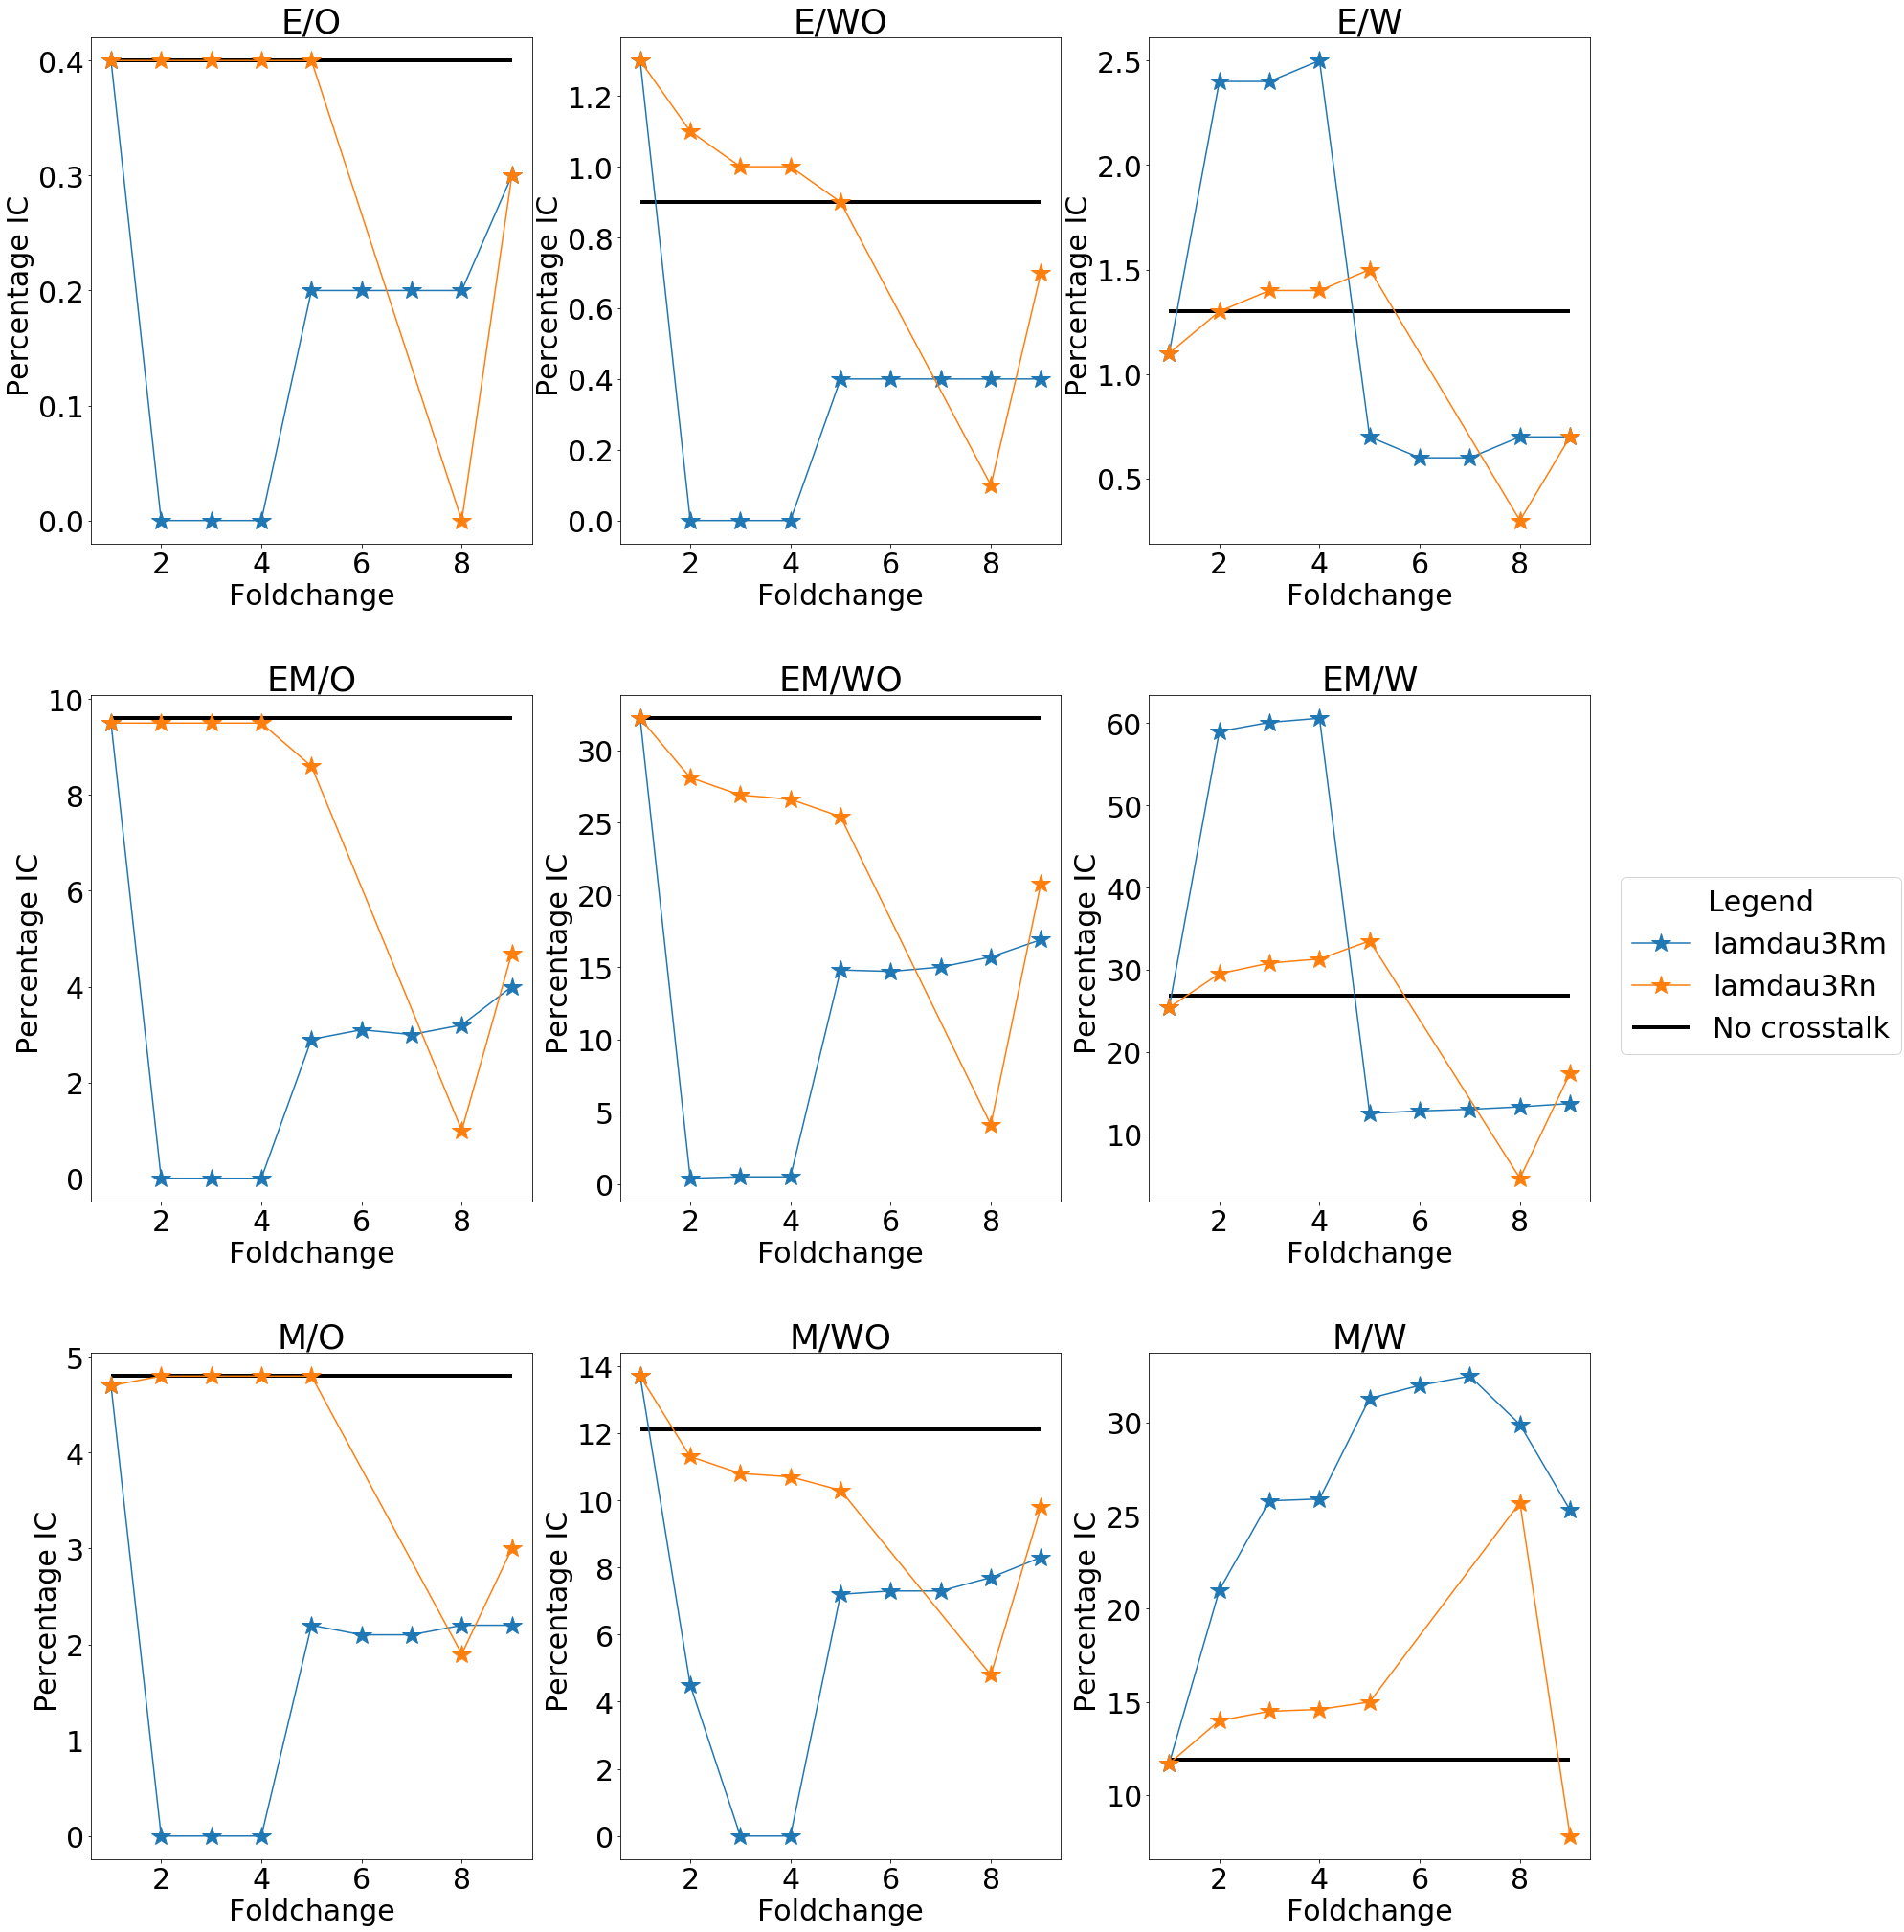

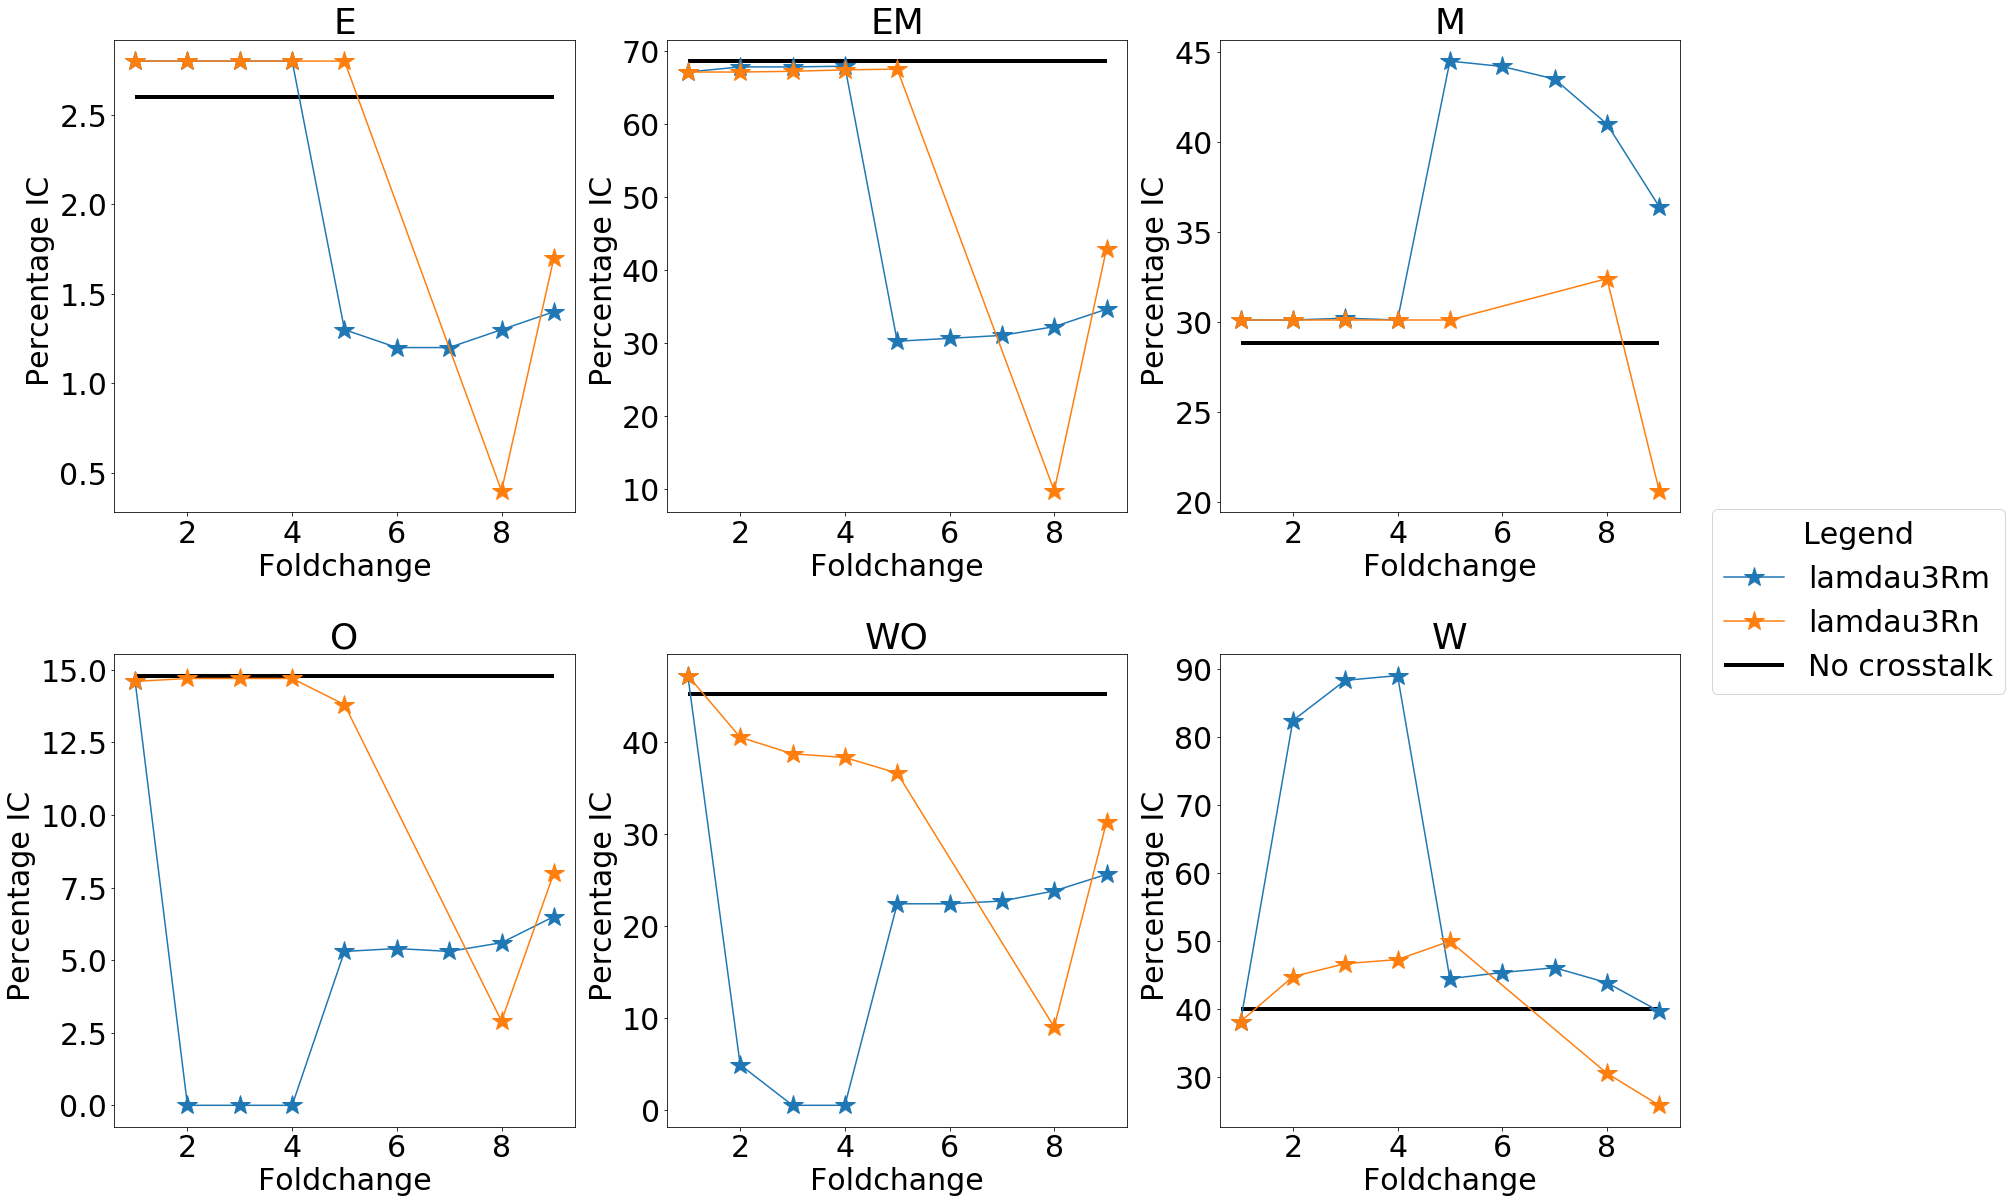

In [14]:
plotPercAll(regsU,'lamdau3Single')